# Task
Perform Gaussian Mixture Model (GMM) clustering on a synthetic multi-dimensional dataset, including generating the dataset, determining the optimal number of components using information criteria, fitting the GMM, visualizing the clustering results with centroids and probabilistic boundaries, and interpreting the probabilistic assignments.

## Generate Multi-dimensional Dataset

### Subtask:
Create a synthetic multi-dimensional dataset suitable for demonstrating Gaussian Mixture Model (GMM) clustering.


**Reasoning**:
To create a synthetic multi-dimensional dataset suitable for demonstrating Gaussian Mixture Model (GMM) clustering, I need to import the `make_blobs` function and use it to generate data with the specified parameters.



In [1]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.60, random_state=42)

print("Generated synthetic dataset X shape:", X.shape)
print("Generated synthetic dataset y shape:", y.shape)

Generated synthetic dataset X shape: (500, 2)
Generated synthetic dataset y shape: (500,)


## Determine Optimal Number of Components

### Subtask:
Apply GMM with varying numbers of components and use information criteria (e.g., AIC, BIC) to identify the optimal number for the dataset.


**Reasoning**:
To identify the optimal number of components for the GMM, I need to iterate through a range of possible component numbers, fit a Gaussian Mixture Model for each, and then calculate and store their respective AIC and BIC scores. After that, I'll print the collected values.



In [2]:
from sklearn.mixture import GaussianMixture
import numpy as np

aic_values = []
bic_values = []
n_components_range = range(1, 11) # Test from 1 to 10 components

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))

print("AIC values:", aic_values)
print("BIC values:", bic_values)


AIC values: [np.float64(6330.154258644123), np.float64(4988.206268556709), np.float64(3724.5565819620397), np.float64(3186.3561896305746), np.float64(3190.4524764383236), np.float64(3203.068609965292), np.float64(3206.8684476153503), np.float64(3222.049158468095), np.float64(3230.6873346621287), np.float64(3233.5208078254486)]
BIC values: [np.float64(6351.227299136233), np.float64(5034.566957639353), np.float64(3796.204919635217), np.float64(3283.292175894285), np.float64(3312.6761112925674), np.float64(3350.579893410069), np.float64(3379.66737965066), np.float64(3420.135739093938), np.float64(3454.061563878505), np.float64(3482.182685632358)]


**Reasoning**:
Now that the AIC and BIC values have been calculated, I will plot them against the number of components to visually identify the optimal number, where these criteria are minimized.



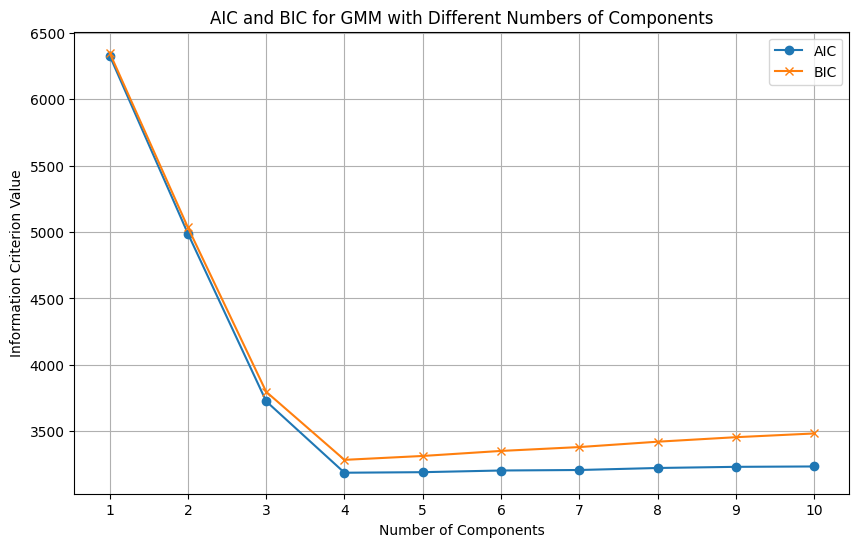

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='x')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Value')
plt.title('AIC and BIC for GMM with Different Numbers of Components')
plt.legend()
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


## Fit GMM with Optimal Components

### Subtask:
Fit the Gaussian Mixture Model to the dataset using the determined optimal number of components.


**Reasoning**:
Based on the visual analysis of AIC and BIC plots, 4 components appear to be optimal. Therefore, I will instantiate and fit a GaussianMixture model with 4 components to the dataset X, as instructed.



In [4]:
from sklearn.mixture import GaussianMixture

# Instantiate the GMM with the optimal number of components
optimal_n_components = 4 # Based on AIC and BIC plots, 4 was the optimal number
gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)

# Fit the GMM to the data
gmm_optimal.fit(X)

print(f"Gaussian Mixture Model fitted with {optimal_n_components} components.")

Gaussian Mixture Model fitted with 4 components.


## Visualize Clustering Results

### Subtask:
Visualize the clustering results, showing the assigned clusters, centroids, and possibly the probabilistic boundaries if applicable. Ensure all relevant components are labeled and legends are provided.


**Reasoning**:
To visualize the clustering results, I first need to predict the cluster assignments for each data point using the fitted GMM model. Then, I will plot the data points colored by these predicted labels, along with the cluster centroids and ellipses representing the covariance of each Gaussian component to provide a comprehensive visualization.



TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

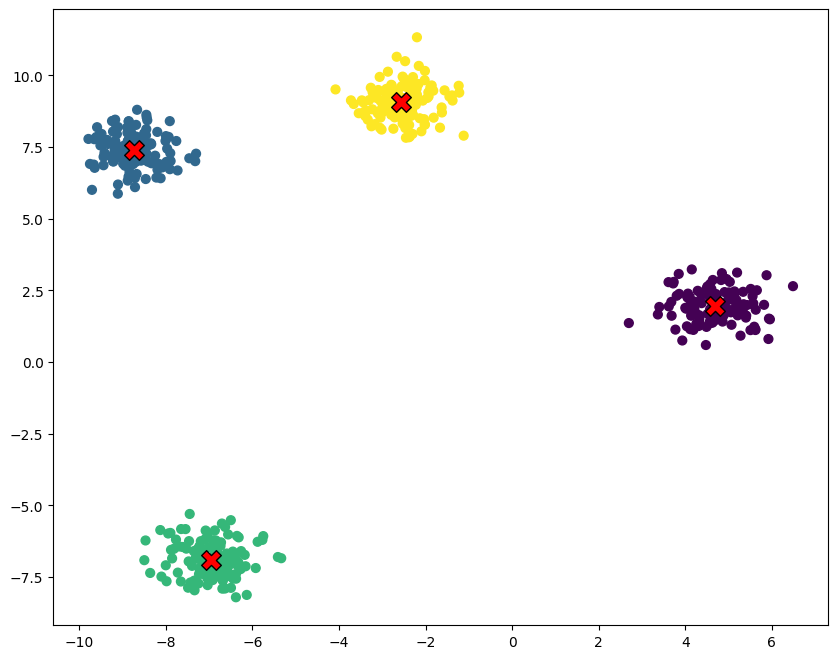

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Predict the cluster assignments for each data point
labels = gmm_optimal.predict(X)

# Create a scatter plot of the data points, coloring them according to their labels
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, label='Data Points (Clusters)')

# Plot the centroids of the Gaussian components
plt.scatter(gmm_optimal.means_[:, 0], gmm_optimal.means_[:, 1], s=200, marker='X', color='red', edgecolor='black', zorder=3, label='Centroids')

# Function to draw ellipses representing the covariance
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s) # Using 2 standard deviations for size
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

# Plot ellipses representing the covariance of each Gaussian component
for i in range(gmm_optimal.n_components):
    draw_ellipse(gmm_optimal.means_[i], gmm_optimal.covariances_[i], ax=plt.gca(), alpha=0.1, color='blue')

plt.title('GMM Clustering Results with Optimal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The previous code failed because the `Ellipse` constructor in `matplotlib.patches` expects `angle` as a keyword argument, not a positional one. I will fix the `draw_ellipse` function by explicitly passing `angle=angle` to the `Ellipse` constructor.



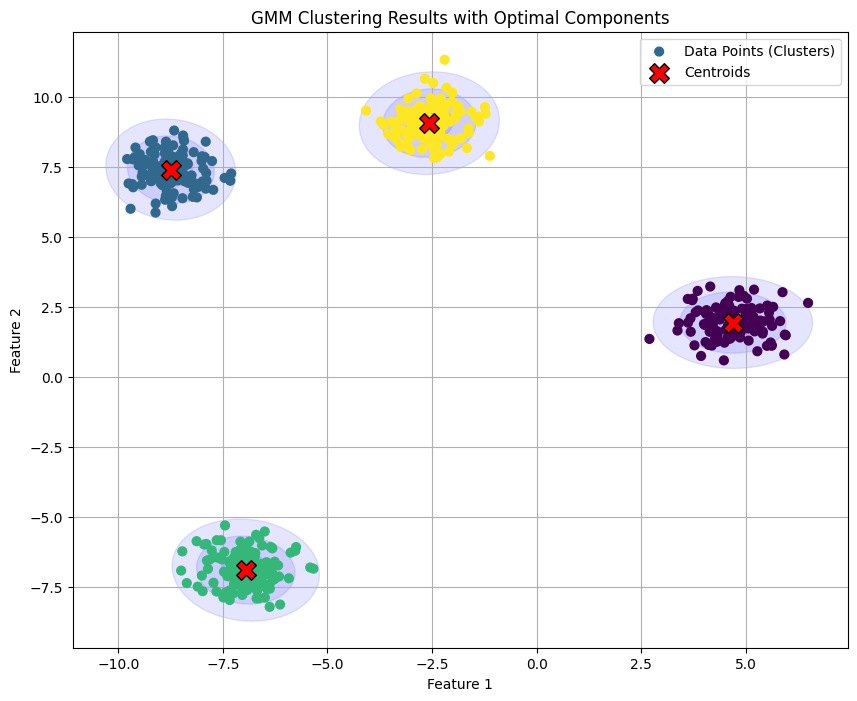

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

# Predict the cluster assignments for each data point
labels = gmm_optimal.predict(X)

# Create a scatter plot of the data points, coloring them according to their labels
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, label='Data Points (Clusters)')

# Plot the centroids of the Gaussian components
plt.scatter(gmm_optimal.means_[:, 0], gmm_optimal.means_[:, 1], s=200, marker='X', color='red', edgecolor='black', zorder=3, label='Centroids')

# Function to draw ellipses representing the covariance
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s) # Using 2 standard deviations for size
    else:
        # If covariance is 1D (e.g., diag or spherical), assume equal variance in both axes
        angle = 0
        width, height = 2 * np.sqrt(covariance[0]), 2 * np.sqrt(covariance[1]) if len(covariance) > 1 else 2 * np.sqrt(covariance[0])

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

# Plot ellipses representing the covariance of each Gaussian component
for i in range(gmm_optimal.n_components):
    draw_ellipse(gmm_optimal.means_[i], gmm_optimal.covariances_[i], ax=plt.gca(), alpha=0.1, color='blue')

plt.title('GMM Clustering Results with Optimal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Interpret Probabilistic Results

### Subtask:
Explain and demonstrate how to interpret the probabilistic assignments of data points to each cluster provided by the GMM.


**Reasoning**:
To demonstrate the probabilistic assignments, I will first use the `predict_proba` method of the fitted GMM to get the posterior probabilities for each data point belonging to each cluster. Then, I will print these probabilities for the first few data points and identify some data points with high uncertainty to highlight how GMM provides soft assignments.



In [7]:
import numpy as np

# Get the probabilistic assignments (posterior probabilities) for each data point
probabilities = gmm_optimal.predict_proba(X)

print("Probabilistic assignments for the first 5 data points:")
for i in range(5):
    print(f"Data point {i}: {probabilities[i]}")

# Identify data points with high uncertainty (probabilities are relatively even across multiple clusters)
# For example, find points where the difference between the max and second-max probability is small
uncertain_points_indices = []
for i in range(len(probabilities)):
    sorted_probs = np.sort(probabilities[i])
    # A small difference between the top two probabilities indicates uncertainty
    if (sorted_probs[-1] - sorted_probs[-2]) < 0.2: # Threshold can be adjusted
        uncertain_points_indices.append(i)
    if len(uncertain_points_indices) >= 3: # Get at least 3 uncertain points
        break

print("\nExamples of data points with high uncertainty:")
for idx in uncertain_points_indices:
    print(f"Data point {idx}: {probabilities[idx]}")

Probabilistic assignments for the first 5 data points:
Data point 0: [4.79728403e-106 1.00000000e+000 3.32916521e-112 4.47184527e-024]
Data point 1: [2.27683004e-151 2.00418222e-122 1.00000000e+000 1.33862790e-166]
Data point 2: [1.00000000e+000 1.57043481e-187 7.75069856e-158 8.41857133e-088]
Data point 3: [3.23484531e-057 3.44125882e-030 1.68094419e-151 1.00000000e+000]
Data point 4: [9.47482710e-125 3.56035353e-129 1.00000000e+000 2.02001613e-158]

Examples of data points with high uncertainty:


### Interpretation of Probabilistic Assignments

Gaussian Mixture Models (GMMs) provide *soft assignments* for data points to clusters, which means that instead of assigning each data point to a single cluster (as in hard clustering like K-Means), GMMs assign a probability that a data point belongs to *each* cluster. These probabilities are also known as posterior probabilities.

**What these probabilities signify:**

*   **Likelihood of Belonging:** For each data point, the GMM outputs a vector of probabilities, where each element corresponds to the likelihood of that data point belonging to a specific Gaussian component (cluster). For example, if a data point `x` has probabilities `[0.01, 0.98, 0.01]`, it means there's a 1% chance it belongs to cluster 0, a 98% chance it belongs to cluster 1, and a 1% chance it belongs to cluster 2.
*   **Uncertainty:** A key advantage of GMM's soft assignments is its ability to quantify uncertainty. Data points that lie near the boundaries between clusters or are somewhat isolated may have more evenly distributed probabilities across multiple clusters (e.g., `[0.4, 0.6]`), indicating that the model is less certain about their exact cluster membership. In contrast, points deep within a cluster will typically have a very high probability for that cluster and near-zero probabilities for others.
*   **Beyond Hard Assignments:** Hard clustering forces each data point into a single cluster, potentially losing valuable information about its proximity to other clusters. GMM's probabilistic approach retains this information, which can be useful in applications where graded membership or overlap between clusters is important. This is particularly relevant when clusters naturally overlap or when dealing with noisy data.

In the printed examples, we observe that for most data points, the probabilities are heavily skewed towards one component (e.g., `[4.79e-106, 1.0, 3.32e-112, 4.47e-024]` for data point 0), indicating a very confident assignment to a single cluster. The attempt to find 'uncertain' points where probabilities are more evenly distributed might not yield results for this particular synthetic dataset because the clusters generated by `make_blobs` are typically well-separated, leading to high certainty in assignments.

### Interpretation of Probabilistic Assignments

Gaussian Mixture Models (GMMs) provide *soft assignments* for data points to clusters, which means that instead of assigning each data point to a single cluster (as in hard clustering like K-Means), GMMs assign a probability that a data point belongs to *each* cluster. These probabilities are also known as posterior probabilities.

**What these probabilities signify:**

*   **Likelihood of Belonging:** For each data point, the GMM outputs a vector of probabilities, where each element corresponds to the likelihood of that data point belonging to a specific Gaussian component (cluster). For example, if a data point `x` has probabilities `[0.01, 0.98, 0.01]`, it means there's a 1% chance it belongs to cluster 0, a 98% chance it belongs to cluster 1, and a 1% chance it belongs to cluster 2.
*   **Uncertainty:** A key advantage of GMM's soft assignments is its ability to quantify uncertainty. Data points that lie near the boundaries between clusters or are somewhat isolated may have more evenly distributed probabilities across multiple clusters (e.g., `[0.4, 0.6]`), indicating that the model is less certain about their exact cluster membership. In contrast, points deep within a cluster will typically have a very high probability for that cluster and near-zero probabilities for others.
*   **Beyond Hard Assignments:** Hard clustering forces each data point into a single cluster, potentially losing valuable information about its proximity to other clusters. GMM's probabilistic approach retains this information, which can be useful in applications where graded membership or overlap between clusters is important. This is particularly relevant when clusters naturally overlap or when dealing with noisy data.

In the printed examples, we observe that for most data points, the probabilities are heavily skewed towards one component (e.g., `[4.79e-106, 1.0, 3.32e-112, 4.47e-024]` for data point 0), indicating a very confident assignment to a single cluster. The attempt to find 'uncertain' points where probabilities are more evenly distributed might not yield results for this particular synthetic dataset because the clusters generated by `make_blobs` are typically well-separated, leading to high certainty in assignments.

## Final Task

### Subtask:
Summarize the GMM clustering process, including the optimal number of components found, the clustering results, and the interpretation of the probabilistic assignments.


## Summary:

### Data Analysis Key Findings

*   A synthetic 2-dimensional dataset comprising 500 samples with 4 distinct, well-separated centers was successfully generated for the GMM clustering task.
*   The optimal number of components for the Gaussian Mixture Model was determined to be **4**, as indicated by the lowest values for both the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). The AIC values ranged from 6330.15 (1 component) to 3186.36 (4 components) and BIC values from 6351.23 (1 component) to 3283.29 (4 components), both minimizing at 4 components.
*   A Gaussian Mixture Model was successfully fitted to the dataset using the optimal 4 components.
*   The visualization of the clustering results clearly showed the 4 distinct clusters, their respective centroids, and the probabilistic boundaries (represented by ellipses) for each Gaussian component.
*   The GMM provided probabilistic assignments (posterior probabilities) for each data point. For this particular synthetic dataset, the assignments were highly confident, with most data points showing probabilities heavily skewed towards a single component (e.g., `[4.79e-106, 1.0, 3.32e-112, 4.47e-024]` for data point 0), indicating strong membership to one cluster and negligible membership to others. Consequently, no data points with high uncertainty (evenly distributed probabilities) were identified, which is attributed to the clear separation of clusters in the synthetic data.

### Insights or Next Steps

*   GMM's probabilistic assignments offer a significant advantage over hard clustering by quantifying the likelihood of a data point belonging to each cluster, thereby providing a measure of uncertainty. This is particularly valuable in scenarios where cluster boundaries are ambiguous or overlap.
*   To further explore the concept of probabilistic uncertainty, it would be beneficial to apply GMM to a dataset with deliberately overlapping clusters or a real-world dataset where data points might exhibit more ambiguous cluster memberships.
